# Project: Investigate TMDb Movie Dataset by Mahmoud Osama

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
We will investigate **TMDb Movie Dataset**
which contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings, cast, genres,budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.

### Questions we need to answer
 - What kinds of properties are associated with movies that have high revenues? :
  - Top 10 Popular Movies.
  - Top 10 Rated Movies.
  - Top 10 Profitable Movies.
  - What is The relation between Profit and Movies Runtime ?
  - Who are The Top Directors with respect to Total Profit taking inflation into consideration ?
  - What are the most Profitable Years taking inflation into consideration ?
 

In [2]:
#import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to make sure that visualizations are plotted inline with the notebook, we will use the magic word.
% matplotlib inline 

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling
**In this section of the report:**
- We will load our dataset.
- Get some insights about our dataset.
- Check for cleanliness.

In [3]:
# Load my data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

### So, our data consists of 10,866 row (records) and 21 columns with the following datatypes:

In [5]:
#inspect data types of our dataset
df.dtypes 

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**We may need to adjust the datatypes of some columns such as** <font color='red'> revenue,budget and release_date for data exploration </font>

### Summary Statistics of our dataset as follow:

In [6]:
# Getting Summary Statistics of our Data Set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Checking a content brief of each column  (Null values checking) as follow:

In [7]:
#Getting more insights about the content of each column and number of null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**We will notice that:** <font color='red'>id, imdb_id, cast, home page, Keywords, tagline, genres and production companies have some missing values </font>

### Getting more insights: Visualizing our Dataset 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D366A0DA0>,
      dtype=object)

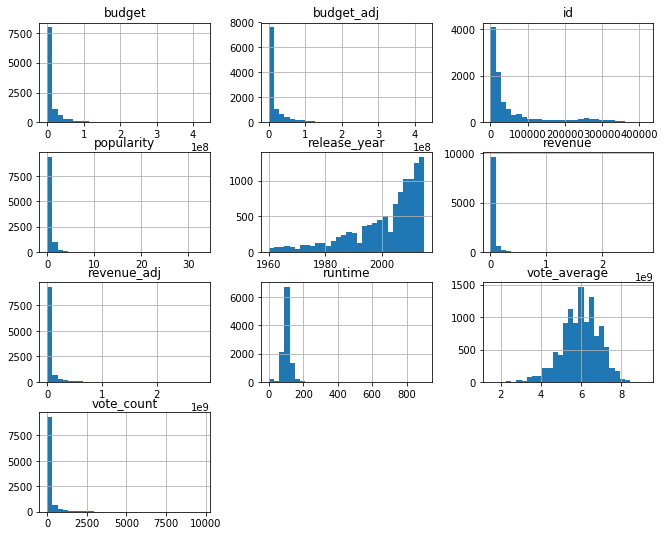

In [8]:
# Draw a histogram for different variables
df.hist(figsize=(11,9),bins=30)

**Firstly, We will notice that:** <font color='red'> popularity, budget, revenue, runtime, budget_adj and revenue_adj columns  have a lot of Zero values </font>

### Checking Exact Number of Zero Values for each variable :

In [9]:
print (df[df['popularity']==0].shape)
print (df[df['runtime']==0].shape)
print (df[df['budget']==0].shape)
print (df[df['budget_adj']==0].shape)
print (df[df['revenue']==0].shape)
print (df[df['revenue_adj']==0].shape)

(0, 21)
(31, 21)
(5696, 21)
(5696, 21)
(6016, 21)
(6016, 21)


**So, We will Notice that :**<font color='red'> budget, revenue and their adjustment columns have many zero values which are about 6000 record. </font> while **popularity** doesn’t have any zero value but have many values that are close to Zero.

### Checking Duplicates by Original_Title (Movies Titles):

In [10]:
Duplicate_Rows_DF = df[df.duplicated(['original_title'])]
print("Count of Duplicate Rows based on Movie Title is:", Duplicate_Rows_DF.original_title.count())


Count of Duplicate Rows based on Movie Title is: 295


**So, We will Notice that :** <font color='red'> There are actually many duplicated Movies Titles which their count is about **295 Movie** </font>

### Data Cleaning:
We will trim and clean our dataset for analysis

Depending on our Analysis we will need to do the following:
- Adjust the Data types for the following columns: popularity, release_date,
- Drop all the columns that we don’t need in our analysis including 'id', 'imdb_id', 'homepage', 'keywords', 'overview' and 'tagline','genres', 'production_companies', 'cast'
- Drop all Rows that have Zero Values in revenue and run time (but will consider zero value revenue in case there is a non-zero value for the budget).
- Removing Duplicates with the same movie name and keeping the first value.
- Adjust the null values in columns that we will use in our analysis but all of them aren’t a numeric data so, we may drop their null values.

In [11]:
# Drop all the columns that we don’t need in our analysis.
df.drop (['id', 'imdb_id', 'homepage', 'overview', 'tagline','keywords', 'genres', 'production_companies', 'cast'],axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#Drop all Rows that have Zero Values in budget (records).
indexNames = df[df['budget'] == 0 ].index
df.drop(indexNames ,axis=0, inplace=True)

In [13]:
df[df['runtime'] == 0]

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1289,0.037459,3250000,0,Treehouse,Michael G. Bartlett,0,10/20/14,16,3.4,2014,2.993546e+06,0.0
4063,0.371510,6000000,0,Madea's Family Reunion,Tyler Perry,0,1/25/02,49,5.9,2002,7.273568e+06,0.0
6383,0.371630,2000000,0,The 12 Dogs of Christmas,Kieth Merrill,0,11/1/05,11,4.7,2005,2.233127e+06,0.0


**We will notice that:** <font color='red'>all runtime of zero values have also zero revenue so, they are mostly fake data. </font>

In [14]:
#Drop all Rows that have Zero Values in run time
indexNames = df[df['runtime'] == 0 ].index
# Delete these row indexes from dataset
df.drop(indexNames ,axis=0, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5167 entries, 0 to 10865
Data columns (total 12 columns):
popularity        5167 non-null float64
budget            5167 non-null int64
revenue           5167 non-null int64
original_title    5167 non-null object
director          5163 non-null object
runtime           5167 non-null int64
release_date      5167 non-null object
vote_count        5167 non-null int64
vote_average      5167 non-null float64
release_year      5167 non-null int64
budget_adj        5167 non-null float64
revenue_adj       5167 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 524.8+ KB


In [16]:
df.drop_duplicates(subset ="original_title",keep = 'first' , inplace = True) 

In [17]:
df.duplicated(subset='original_title', keep='first').sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5084 entries, 0 to 10865
Data columns (total 12 columns):
popularity        5084 non-null float64
budget            5084 non-null int64
revenue           5084 non-null int64
original_title    5084 non-null object
director          5080 non-null object
runtime           5084 non-null int64
release_date      5084 non-null object
vote_count        5084 non-null int64
vote_average      5084 non-null float64
release_year      5084 non-null int64
budget_adj        5084 non-null float64
revenue_adj       5084 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 516.3+ KB


**We will notice that:** <font color='red'>director column still have four missing values </font>

In [19]:
df[df.director.isnull()]

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1203,0.119891,150000,0,Free to Play,NaN,75,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1872,0.091395,3250000,0,Paa,NaN,133,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00
3276,0.147657,4180000,11000000,Kismat Konnection,NaN,153,7/18/08,11,5.8,2008,4.233448e+06,1.114065e+07
5866,0.211825,5000000,0,Jinxed,NaN,75,11/29/13,19,7.0,2013,4.680167e+06,0.000000e+00


**We will replace Null values in director column with 'No Director'**

In [20]:
df.fillna('No Director Name', inplace = True)

In [21]:
print(df.isnull().sum())

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64


**So, there is not any null values through our dataset.**

### Adjusting the datatypes for some variables 

In [22]:
# adjusting budget and revneue data type to integer
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [23]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,137999939,348161292
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,101199955,271619025
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,183999919,1902723129
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis
### What kinds of properties are associated with movies that have high revenues?
We will create Profit_adj from revenue_adj and budget_adj to be my dependant variable as it will be more realitic and fair to compare with, more than revenue and budget taking into consideration the Inflation happened through out the years, while release-year,director and run time are my independant variables.

In [24]:
# create a new column that contains the profit to know most successful movies
df['profit_adj']= df['revenue_adj'] - df['budget_adj']

### Top 10 Profitable Movies

In [25]:
# sorting ascending according to profit
df.sort_values(['profit_adj'], ascending = False).head(10)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
10594,2.010733,8000000,441306145,The Exorcist,William Friedkin,122,12/26/73,1113,7.2,1973,39289276,-2147483648,2108194372
1329,12.037933,11000000,775398007,Star Wars,George Lucas,121,3/20/77,4428,7.9,1977,39575591,-2147483648,2107908057
1386,9.432768,237000000,-1513461449,Avatar,James Cameron,162,12/10/09,8458,7.1,2009,240886902,-2147483648,1906596746
9806,2.563191,7000000,470654000,Jaws,Steven Spielberg,124,6/18/75,1415,7.3,1975,28362748,1907005841,1878643093
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,11/18/97,4654,7.3,1997,271692064,-2147483648,1875791584
8889,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Steven Spielberg,115,4/3/82,1830,7.2,1982,23726245,1791694309,1767968064
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,183999919,1902723129,1718723210
8094,1.136610,22000000,1106279658,The Net,Irwin Winkler,114,7/28/95,201,5.6,1995,31481271,1583049536,1551568265
10110,2.631987,4000000,215880014,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,1/25/61,913,6.6,1961,29179444,1574814739,1545635295
7309,5.488441,18000000,538400000,The Empire Strikes Back,Irvin Kershner,124,1/1/80,3954,8.0,1980,47628661,1424626187,1376997526


**We will notice that:** <font color='Green'>James Cameron and Steven Spielberg have both directed Two Movies in 
    the Top Profitable Movies </font>

### Top 10 Popular Movies  

In [26]:
df.sort_values(['popularity'], ascending = False).head(10)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,137999939,1392445892,1254445953
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,137999939,348161292,210161353
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,11/5/14,6498,8.0,2014,151980023,572690645,420710622
630,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,7/30/14,5612,7.9,2014,156585478,712291130,555705652
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,101199955,271619025,170419070
631,12.971027,170000000,714766572,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,3/20/14,3848,7.6,2014,156585478,658365092,501779614
1329,12.037933,11000000,775398007,Star Wars,George Lucas,121,3/20/77,4428,7.9,1977,39575591,-2147483648,2107908057
632,11.422751,20000000,78739897,John Wick,Chad Stahelski|David Leitch,101,10/22/14,2712,7.0,2014,18421821,72526614,54104793
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,183999919,1902723129,1718723210
633,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,123,11/18/14,3590,6.6,2014,115136381,692752790,577616409


**We will notice that:** <font color='Green'>Star Wars and Star Wars: The Force Awakens Movies exist in both Top 10 Profitable Movies and Top 10 Popular Movies </font>

### Top 10 Rated Movies

In [27]:
df.sort_values(['vote_average'], ascending = False).head(10)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
5986,0.054380,4000000,0,"Guten Tag, RamÃ³n",Jorge RamÃ­rez SuÃ¡rez,119,10/18/13,11,8.4,2013,3744133,0,-3744133
7948,0.283191,1200000,4978922,Stop Making Sense,Jonathan Demme,88,11/16/84,23,8.4,1984,2518850,10450966,7932116
4178,7.192039,25000000,28341469,The Shawshank Redemption,Frank Darabont,142,9/10/94,5754,8.4,1994,36777789,41693462,4915673
7269,5.738034,6000000,245066411,The Godfather,Francis Ford Coppola,175,3/15/72,3970,8.3,1972,31287365,1277913732,1246626367
650,4.780419,3300000,13993093,Whiplash,Damien Chazelle,105,10/10/14,2372,8.2,2014,3039600,12888912,9849312
10222,2.377288,22000000,321265768,Schindler's List,Steven Spielberg,195,11/29/93,2632,8.1,1993,33208339,484941026,451732687
3826,0.146477,30000000,0,Kill Bill: The Whole Bloody Affair,Quentin Tarantino,247,3/28/11,28,8.1,2011,29081941,0,-29081941
8043,0.206849,1100000,0,Michael Jackson's Thriller,John Landis,13,12/2/83,30,8.1,1983,2408243,0,-2408243
9758,3.264571,13000000,47542841,The Godfather: Part II,Francis Ford Coppola,200,12/20/74,2131,8.1,1974,57489690,210247939,152758249
2875,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,152,7/16/08,8432,8.1,2008,187365527,1014733032,827367505


**We will notice that:** <font color='red'>There is not even one Movie from the Top rated in 
    the Top Profitable or Top Popular Movies so, there is actually no direct relation between movies rate and its profit </font>

### What is The relation between Profit and Movies Runtime ?


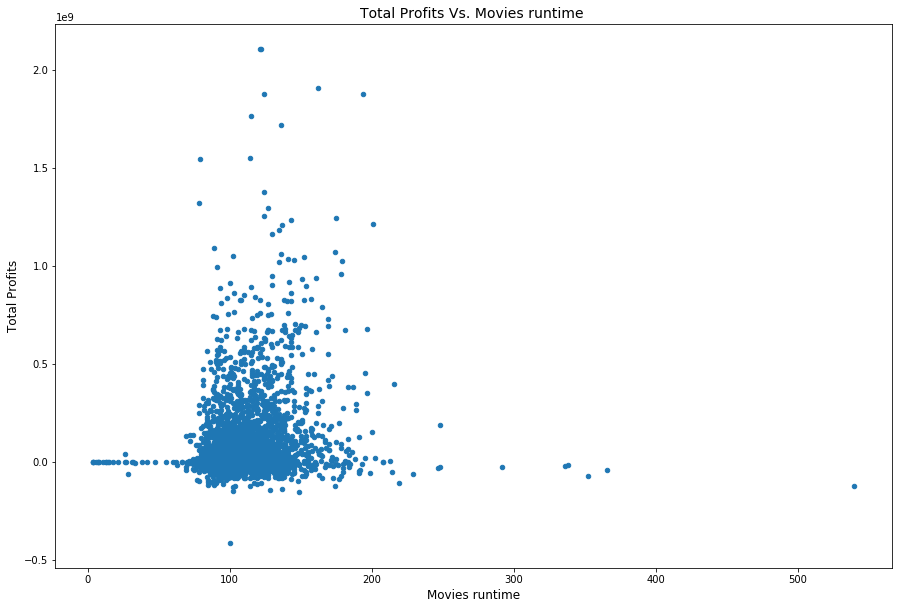

In [28]:
df.plot(kind='scatter',x='runtime',y='profit_adj',figsize= (15,10))
plt.xlabel('Movies runtime', fontsize = 12)
plt.ylabel('Total Profits', fontsize = 12)
plt.title('Total Profits Vs. Movies runtime ', fontsize = 14);


**We will notice that:** <font color='Green'>Most Movies in General and Top Profitable Movies are beween 100 & 200 min </font>

### Who are The Top Directors with respect to Total Profit taking inflation into consideration ?

In [29]:
profit_director = df.groupby('director', as_index=False)['profit_adj'].sum()
top_profit_directors = profit_director.sort_values(['profit_adj'], ascending = False).head(10)
top_profit_directors

,director,profit_adj
2143,Steven Spielberg,1.305068e+10
1746,Peter Jackson,5.644123e+09
901,James Cameron,5.257667e+09
756,George Lucas,5.201931e+09
1922,Robert Zemeckis,4.194737e+09
335,Chris Columbus,4.152751e+09
1496,Michael Bay,3.958676e+09
536,David Yates,3.394430e+09
2202,Tim Burton,3.200460e+09
373,Christopher Nolan,3.149568e+09


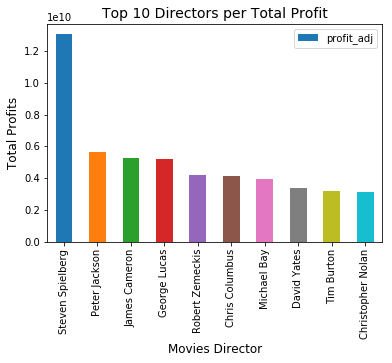

In [30]:
top_profit_directors.plot(kind='bar',x='director',y='profit_adj')
plt.xlabel('Movies Director', fontsize = 12)
plt.ylabel('Total Profits', fontsize = 12)
plt.title('Top 10 Directors per Total Profit', fontsize = 14);
plt.show()

**We will notice that:** <font color='Green'>James Cameron and Steven Spielberg have earned the Top Profits at all</font>

### What are the most Profitable Years taking inflation into consideration ?

In [31]:
profit_year = df.groupby('release_year', as_index=False)['profit_adj'].sum()
top_profit_years = profit_year.sort_values(['profit_adj'], ascending = False).head(10)
top_profit_years

,release_year,profit_adj
55,2015,1.711786e+10
52,2012,1.511079e+10
54,2014,1.487491e+10
53,2013,1.414780e+10
51,2011,1.395021e+10
49,2009,1.254683e+10
50,2010,1.244936e+10
47,2007,1.145074e+10
48,2008,1.113700e+10
44,2004,1.075408e+10


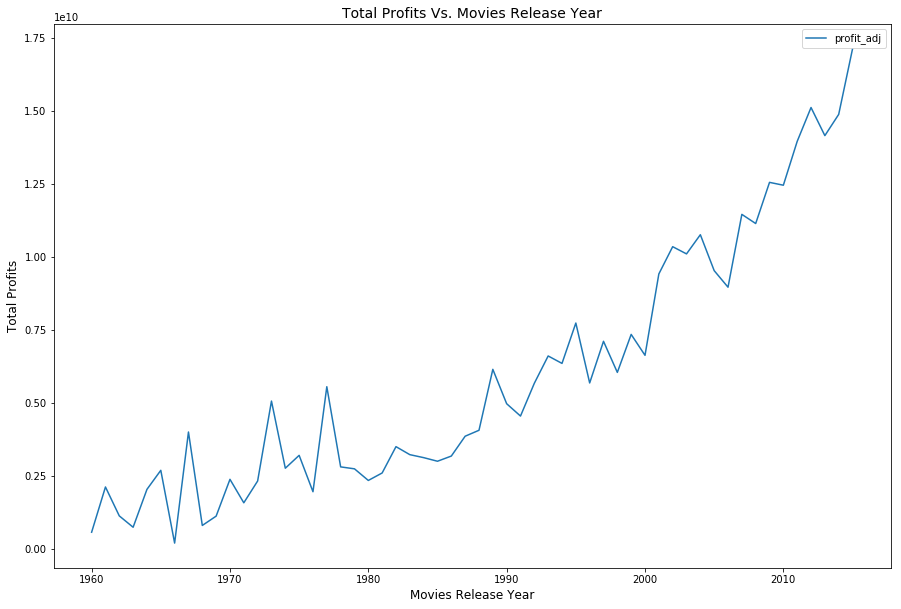

In [32]:
profit_year.plot(x='release_year',y='profit_adj',figsize= (15,10))
plt.xlabel('Movies Release Year', fontsize = 12)
plt.ylabel('Total Profits', fontsize = 12)
plt.title('Total Profits Vs. Movies Release Year', fontsize = 14);

**We will notice that:** <font color='Green'>Movies industry is rising greatly in profits through out the years </font>

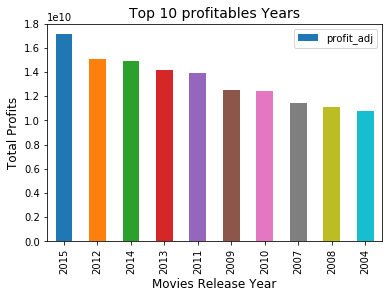

In [33]:
top_profit_years.plot(kind='bar',x='release_year',y='profit_adj')
plt.xlabel('Movies Release Year', fontsize = 12)
plt.ylabel('Total Profits', fontsize = 12)
plt.title('Top 10 profitables Years', fontsize = 14);
plt.show()

<a id='conclusions'></a>
## Conclusions
- Movies industry is rising greatly in profits through out the years especially last ten years taking inflation into consideration.
- Star Wars Movie is considered the most succesful movie through history as it is mentioned in TOP 10 Profitable and Top 10 Popular Movies.
- Most Movies in General and Top Profitable Movies are beween 100 & 200 min.
- James Cameron and Steven Spielberg as Movies’ directors, their movies have earned the Top Profits at all.

### Limitations

- Disregarding all zero values in budget and run_time rows
- Replacing Null values for director column with 'No Director Name' value
- Drop all the following columns that we didn’t need in our analysis including 'id', 'imdb_id', 'homepage', 'keywords', 'overview' and 'tagline','genres', 'production_companies', 'cast'.
- Removing Duplicates with the same movie name and keeping the first value.